Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

Create a normal distribution parameters

In [3]:
avg = 1
stddev = .1
num_reps = 500
num_sim = 1000

Create a distribution for possible target %'s

In [7]:
pct_to_target = np.random.normal(avg,stddev,num_reps)
pct_to_target[0:5]

array([1.0742971 , 0.94121524, 1.00957077, 0.92456923, 1.12602357])

Let's create some target amounts


In [8]:
sales_tgt_values = [75000,100000,200000,300000,400000,500000]
sales_tgt_prob = [.3,.3,.2,.1,.05,.05]
sales_tgt = np.random.choice(sales_tgt_values,num_reps,p=sales_tgt_prob)

In [10]:
sales_tgt[0:10]

array([200000, 300000, 100000, 200000, 300000, 400000, 500000, 100000,
        75000, 500000])

lets put it in a dataframe

In [14]:
df = pd.DataFrame({'pct_to_target': pct_to_target,
                   'sales_target': sales_tgt})
df.head()


,pct_to_target,sales_target
0,1.074297,200000
1,0.941215,300000
2,1.009571,100000
3,0.924569,200000
4,1.126024,300000


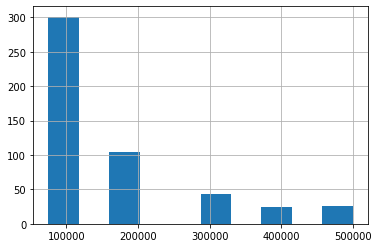

In [15]:
df.sales_target.hist()

lets create a sales variable


In [19]:
df['sales'] = df.pct_to_target * df.sales_target
df.head()

0      214859.42
1      282364.57
2      100957.08
3      184913.85
4      337807.07
         ...    
495     68845.86
496     72896.83
497    206611.95
498     98475.02
499     75082.60
Name: sales, Length: 500, dtype: float64

In [ ]:
lets create a commission rate


Creating a commision rate

In [20]:
def comm_rate(x):
  if x <= 9:
    return .02
  if x <= .99:
    return .03
  else:
    return .04

In [22]:
df['comm_rate'] = df['pct_to_target'].apply(comm_rate)

In [23]:
df.head()

,pct_to_target,sales_target,sales,comm_rate
0,1.074297,200000,214859.419300,0.02
1,0.941215,300000,282364.572180,0.02
2,1.009571,100000,100957.076679,0.02
3,0.924569,200000,184913.846977,0.02
4,1.126024,300000,337807.071422,0.02


lets add a commission amount


In [26]:
df['comm_amt'] = df['comm_rate'] * df['sales'] 
df

,pct_to_target,sales_target,sales,comm_rate,comm_amt
0,1.074297,200000,214859.419300,0.02,4297.188386
1,0.941215,300000,282364.572180,0.02,5647.291444
2,1.009571,100000,100957.076679,0.02,2019.141534
3,0.924569,200000,184913.846977,0.02,3698.276940
4,1.126024,300000,337807.071422,0.02,6756.141428
...,...,...,...,...,...
495,0.917945,75000,68845.860637,0.02,1376.917213
496,0.971958,75000,72896.826338,0.02,1457.936527
497,1.033060,200000,206611.949364,0.02,4132.238987
498,0.984750,100000,98475.017709,0.02,1969.500354


count      500.000000
mean      3306.959939
std       2358.857897
min       1135.043207
25%       1629.349017
50%       2076.331407
75%       4137.853132
max      11759.926763
Name: comm_amt, dtype: float64


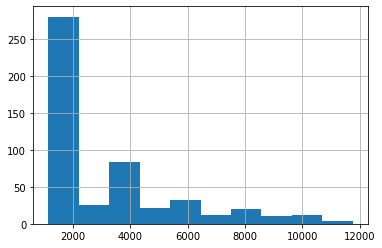

In [29]:
print(df.comm_amt.describe())
df.comm_amt.hist()

Putting in all together in  loop to collect the results of all simulations

In [41]:
from pandas.core.common import random_state
all_stats = []

for i in range(num_sim):
  sales_tgt = np.random.choice(sales_tgt_values,num_reps,p=sales_tgt_prob, )
  pct_to_target = np.random.normal(avg,stddev,num_reps)

  df = pd.DataFrame({'pct_to_target': pct_to_target,
                   'sales_target': sales_tgt})
  
  df['sales'] = df.pct_to_target * df.sales_target
  df['comm_rate'] = df['pct_to_target'].apply(comm_rate)
  df['comm_amt'] = df['comm_rate'] * df['sales'] 

  all_stats.append([df['sales'].mean(),
                    df['comm_amt'].mean(),
                    df['sales_target'].mean()])


In [42]:
results = pd.DataFrame(all_stats, columns=['sales','comm_amt','sales_target'])
                       
results.head()

,sales,comm_amt,sales_target
0,165939.842827,3318.796857,166200.0
1,168598.326550,3371.966531,166650.0
2,164074.120302,3281.482406,165300.0
3,166732.467435,3334.649349,166250.0
4,167859.951561,3357.199031,166850.0


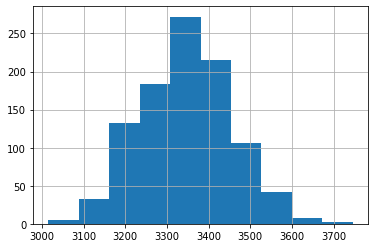

In [43]:
results.comm_amt.hist()

In [48]:
results.comm_amt.quantile(.025),results.comm_amt.quantile(.975)

(3145.9906723337795, 3563.0550718089885)